# Лабораторная работа № 3. Регрессионный анализ данных

## Выполнил: Мазенков Михаил Александрович

## Учебная группа: 18ивт2

## Вариант 13

## Набор данных 1: houses_sales

## Кодировка классификаторов
### 1.Линейная регресссия, LASSO регуляризатор
### 2.Линейная регресссия, RIDGE регуляризатор

### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

### 1.id - уникальные идентификационный номер
### 2.date - дата продажи
### 3.price - цена
### 4.bedrooms - количество спален
### 5.bathrooms - количество ванных комнат
### 6.sqft_living - квадратные метры жилых помещений
### 7.sqft_lot - квадратные метры участка
### 8.floors - этажи
### 9.waterfront - вид на набережную
#### 10.view - общий вид
### 11.condition - состояние квартиры
### 12.grade - класс
### 13.sqft_above - квадратные метры внутренней жилой площади над уровнем земли
### 14.sqft_basement - квадратные метры внутренней жилой площади, которая находится ниже уровня земли
### 15.yr_built - год постройки дома
### 16.yr_renovated - год последней реконструкции дома
### 17.zipcode - удалённость от почты
### 18.lat - широта
### 19.long - долгота
### 20.sqft_living15 - вадратные метры внутренней жилой площади жилья для ближайших 15 соседей
### 21.sqft_lot15 - площадь участка земельных участков ближайших 15 соседей


### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import sklearn as skl
import warnings
from scipy.stats import pearsonr, spearmanr
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split


In [15]:
df = pd.read_csv("kc_house_data.csv")

In [16]:
df.shape

(21613, 21)

In [17]:
df.drop_duplicates().shape

(21613, 21)

 #### Дубликаты отсутствуют 

### 3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для призаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [18]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
numerical = [i for i in df.columns if df[i].dtype.name != 'object']
print('numerical: ', numerical)

numerical:  ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


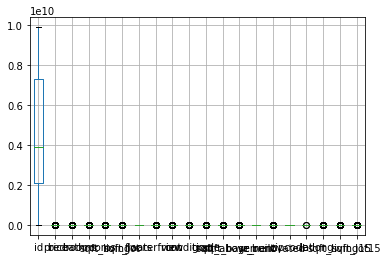

In [20]:
df.boxplot()

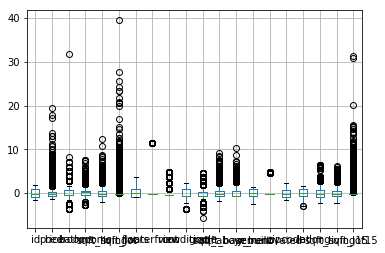

In [21]:

numerical = df[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']] 
numerical = (numerical - numerical.mean()) / numerical.std() 
numerical.boxplot()

### 4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [22]:
categorial = [i for i in df.columns if df[i].dtype.name == 'object']
print('categorial: ', categorial)

categorial:  ['date']


In [23]:
label_encoder = LabelEncoder()
pd.Series(label_encoder.fit_transform(df['date']))
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

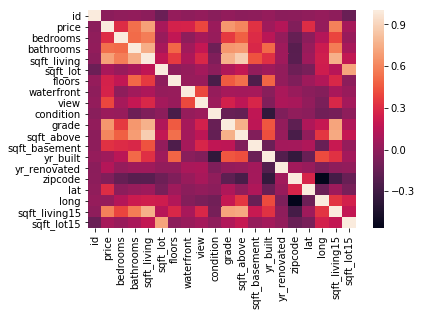

In [24]:
sns.heatmap(df.corr())

##### Признаки коррелируют равномерно

### 7.	Заполните пропущенные значения в данных;

In [25]:
df.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

##### Пропуски данных отсутствуют

## 7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

### 1.Линейная регресссия, LASSO регуляризатор

In [26]:
from sklearn.linear_model import Lasso

df.drop(['date'],1,inplace=True)
X_data, Y_data = df.drop("grade", axis=1).values, df["grade"].values
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.33, random_state=0)


lasso = Lasso()

params = {'alpha': np.arange(2, 5, 0.05)}
lasso_grid = GridSearchCV(lasso, params)
lasso_grid.fit(X_train, y_train)
best_alpha = lasso_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

best alpha: 2.0


In [28]:
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train,y_train)
pred_las = lasso.predict(X_test)
P, p_value_P = pearsonr(pred_las, y_test)
print("Pearson correlation: ", P)
S, p_value_S = spearmanr(pred_las, y_test)
print("Spearmen correlation: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)
print(pred_las[:15] - y_test[:15])

Pearson correlation:  0.843024340753
Spearmen correlation:  0.826144350588
P_VALUSE_P : 0.0
P_VALUSE_S : 0.0
[ 0.17645016 -1.06917635 -0.21595583 -1.03133603 -0.08464052  0.61441346
  0.23509964  0.28196707 -0.74673261 -0.95683372 -0.79268784  0.62588402
 -0.83880069  0.0788606   0.05766519]


### 2.Линейная регресссия, RIDGE регуляризатор

In [29]:
from sklearn.linear_model import Ridge

reg = Ridge()
params = {'alpha': np.arange(2, 5, 0.05)}
reg_grid = GridSearchCV(reg, params)
reg_grid.fit(X_train, y_train)
best_alpha = reg_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

best alpha: 2.0


In [30]:
reg = Ridge(alpha=best_alpha)
reg.fit(X_train,y_train)
pred_reg = reg.predict(X_test)
P, p_value_P = pearsonr(pred_reg, y_test)
print("Pearson correlation: ", P)
S, p_value_S = spearmanr(pred_reg, y_test)
print("Spearmen correlation: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)
print(pred_reg[:15] - y_test[:15])

Pearson correlation:  0.851757170486
Spearmen correlation:  0.835926302359
P_VALUSE_P : 0.0
P_VALUSE_S : 0.0
[ 0.56328706 -1.07074652 -0.31427397 -1.07242389  0.09988382  0.69762314
  0.1958799   0.40638703 -0.73730738 -0.54087576 -1.00177507  0.71781922
 -0.387043    0.04593634  0.0526937 ]
